# Final Project Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('dso499_final_project.csv')
data.head()
data.shape

(3540, 6)

## Let's set "the number of initially infected people" as new index

In [2]:
data = data.set_index('initial_infected')
data.head(5)

,maximum_hospitalized,effected_by_closure,number_recovered,closed_headcount,epidemic_duration
initial_infected,,,,,
2,2,4233,2,2,11
2,2,4233,2,2,11
2,2,4233,2,2,11
2,2,4233,2,2,11
2,2,4233,2,2,11


## Let's break down the dataframe into three different dataframes based on the index (initial_infected). Each represents its own scenario.

In [3]:
two_initial = data.loc[2]
twenty_initial = data.loc[20]
forty_initial = data.loc[40]

twenty_initial.head()

,maximum_hospitalized,effected_by_closure,number_recovered,closed_headcount,epidemic_duration
initial_infected,,,,,
20,20,4233,20,2,11
20,20,4233,20,2,11
20,20,4233,20,2,11
20,20,4233,20,2,11
20,20,4233,20,2,11


## Since this is raw data, we should group by "closed_headcount" then get the average of each variable.

In [4]:
two_initial = two_initial.groupby('closed_headcount')\
    [['maximum_hospitalized', 'effected_by_closure', 'number_recovered', 'epidemic_duration']].mean()
twenty_initial = twenty_initial.groupby('closed_headcount')\
    [['maximum_hospitalized', 'effected_by_closure', 'number_recovered', 'epidemic_duration']].mean()
forty_initial = forty_initial.groupby('closed_headcount')\
    [['maximum_hospitalized', 'effected_by_closure', 'number_recovered', 'epidemic_duration']].mean()

twenty_initial.head()

,maximum_hospitalized,effected_by_closure,number_recovered,epidemic_duration
closed_headcount,,,,
2,20.0,4233.0,20.0,11.0
3,20.1,4205.8,20.2,11.6
4,20.2,4185.2,20.4,12.2
5,22.1,4137.9,24.9,16.9
6,23.1,4097.4,26.2,16.0


## Now we sift the dataframes by eliminating rows whose average number of maximum_hospitalized is over 50, so that the hospital capacity is accounted for in the scenarios.

In [5]:
two_initial_max50 = two_initial[two_initial.maximum_hospitalized <= 50]
twenty_initial_max50 = twenty_initial[twenty_initial.maximum_hospitalized <= 50]
forty_initial_max50 = forty_initial[forty_initial.maximum_hospitalized <= 50]

In [6]:
two_initial_max50.head()

,maximum_hospitalized,effected_by_closure,number_recovered,epidemic_duration
closed_headcount,,,,
2,2.0,4233.0,2.0,11.0
3,2.0,4205.0,2.0,11.0
4,2.1,4184.5,2.1,11.3
5,2.1,4128.4,2.2,11.4
6,2.5,4084.0,2.6,11.9


In [7]:
twenty_initial_max50.head()

,maximum_hospitalized,effected_by_closure,number_recovered,epidemic_duration
closed_headcount,,,,
2,20.0,4233.0,20.0,11.0
3,20.1,4205.8,20.2,11.6
4,20.2,4185.2,20.4,12.2
5,22.1,4137.9,24.9,16.9
6,23.1,4097.4,26.2,16.0


In [8]:
forty_initial_max50.head()

,maximum_hospitalized,effected_by_closure,number_recovered,epidemic_duration
closed_headcount,,,,
2,40.0,4233.0,40.0,11.0
3,40.6,4207.4,40.8,12.4
4,40.5,4187.6,40.8,12.9
5,44.7,4145.7,47.8,17.0
6,45.5,4118.2,51.7,17.7


## With the dataframes ready, we can easily compute the largest "X" for each of the scenarios
## = the headcount level that society can tolerate up to

In [9]:
print("Initial Infected = 2")
print("Head Count \"X\" =", two_initial_max50.index.max())
print("Peak Hospitalized =", two_initial_max50["maximum_hospitalized"].max())
print("Number Recovered =", two_initial_max50["number_recovered"].max())


Initial Infected = 2
Head Count "X" = 46
Peak Hospitalized = 48.4
Number Recovered = 159.4


In [10]:
print("Initial Infected = 20")
print("Head Count \"X\" =", twenty_initial_max50.index.max())
print("Peak Hospitalized =", twenty_initial_max50["maximum_hospitalized"].max())
print("Number Recovered =", twenty_initial_max50["number_recovered"].max())

Initial Infected = 20
Head Count "X" = 17
Peak Hospitalized = 49.0
Number Recovered = 84.9


In [11]:
print("Initial Infected = 40")
print("Head Count \"X\" =", forty_initial_max50.index.max())
print("Peak Hospitalized =", forty_initial_max50["maximum_hospitalized"].max())
print("Number Recovered =", forty_initial_max50["number_recovered"].max())

Initial Infected = 40
Head Count "X" = 7
Peak Hospitalized = 46.2
Number Recovered = 52.4


## Drawing More Insight: # of Hospitalized on the way to the ideal headcount
## In order to help the government plan better, we've visualized how the number of the hospitalized would fluctuate for the changes in head count

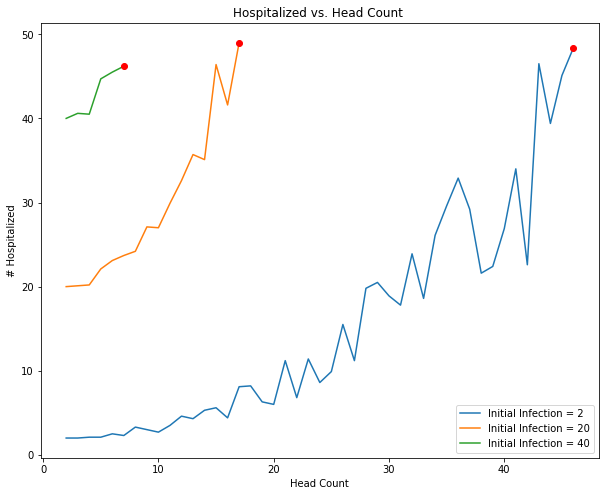

In [12]:
plt.figure(figsize=(10,8))
plt.plot(two_initial_max50.maximum_hospitalized)
plt.plot(twenty_initial_max50.maximum_hospitalized)
plt.plot(forty_initial_max50.maximum_hospitalized)

plt.xlabel("Head Count")
plt.ylabel("# Hospitalized")
plt.title("Hospitalized vs. Head Count ")

plt.legend(["Initial Infection = 2", "Initial Infection = 20", "Initial Infection = 40"])
plt.plot(46,two_initial_max50.maximum_hospitalized[46],'ro')
plt.plot(17,twenty_initial_max50.maximum_hospitalized[17],'ro')
plt.plot(7,forty_initial_max50.maximum_hospitalized[7],'ro')

## Drawing More Insight: Likelly Impact on the Economy due to the # of people quarantined
## We've also visualized how the # of the quarantined would fluctuate for the changes in head count

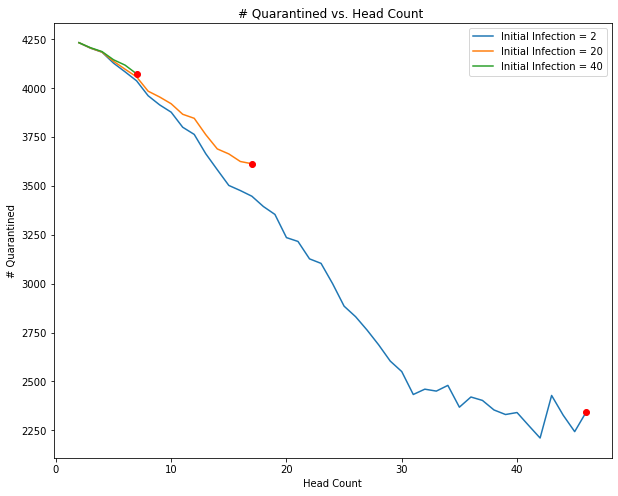

In [13]:
plt.figure(figsize=(10,8))
plt.plot(two_initial_max50.effected_by_closure)
plt.plot(twenty_initial_max50.effected_by_closure)
plt.plot(forty_initial_max50.effected_by_closure)

plt.xlabel("Head Count")
plt.ylabel("# Quarantined")
plt.title("# Quarantined vs. Head Count ")

plt.legend(["Initial Infection = 2", "Initial Infection = 20", "Initial Infection = 40"])
plt.plot(46,two_initial_max50.effected_by_closure[46],'ro')
plt.plot(17,twenty_initial_max50.effected_by_closure[17],'ro')
plt.plot(7,forty_initial_max50.effected_by_closure[7],'ro')